# Background

Climate change has been a stuff of debate for many years. As a Clean Energy graduate from Temasek Poly, I always wonder why am I being taught alternative ways to generate energy, yet, most countries are still generating energy the "destructive" ways - which some assume to be the cause of climate change as current energy generation emits greenhouse gases.

I always thought to myself,

* *is climate change not true?*

* *is climate change just a sign of the earth aging and has nothing to do with greenhouse gases?*

I would like to take this opportunity to see how Data Science can be used to answer the above question.

## Proposal

For this project proposal, I will be doing a project regarding Climate change.

My current Null hypothesis : **"Greenhouse gases has nothing to do with climate change"**

The datasets I obtained are from this link:

Temperature data:

https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/kernels

International greenhouse emission data:

https://www.kaggle.com/unitednations/international-greenhouse-gas-emissions

## Risk / Limitation

* The countries listed in each datasets varies. As such, some contries will be missing.
* Can't find the dictionary for each dataset. The greenhouse emission data has long column name which is hard to understand.


<h4> Import libraries </h4>

In [1]:
%matplotlib inline
import pandas as pd  # 0.23.0
import numpy as np
import matplotlib.pyplot as plt  # 2.2.2
import seaborn as sns

<h4>Let's create 2 dataframes:</h4>

In [2]:
import pandas as pd
from datetime import datetime

temperature_data = 'Temperature/GlobalLandTemperaturesByCountry.csv'
column_names = ['Datetime', 'Temperature', 'Uncertainty', 'Country']
temperature_df = pd.read_csv(temperature_data, skiprows = 1, names = column_names)

greenhouse_data = 'Greenhouse-Gasses/greenhouse_gas_inventory_data_data.csv'
column_names = ['Country', 'Year', 'Value', 'Greenhouse Category']
greenhouse_df = pd.read_csv(greenhouse_data, skiprows = 1, names = column_names)

<h3> Checking the datatypes </h3>

In [48]:
temperature_df.dtypes

Datetime       datetime64[ns]
Temperature           float64
Uncertainty           float64
Country                object
dtype: object

In [4]:
greenhouse_df.dtypes

Country                 object
Year                     int64
Value                  float64
Greenhouse Category     object
dtype: object

<h3> Converting temperature_df to datetime <h/3>

In [5]:
temperature_df['Datetime'] = pd.to_datetime(temperature_df.Datetime)

In [6]:
temperature_df.head()

,Datetime,Temperature,Uncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [7]:
temperature_df.dtypes

Datetime       datetime64[ns]
Temperature           float64
Uncertainty           float64
Country                object
dtype: object

<h3> Next, explore 'Country' column from both dataframes.</h3>

In [8]:
temperature_df.Country.nunique()

243

In [9]:
greenhouse_df.Country.nunique()

43

The total number of contries vary from both dataframe. 

As such, lets make greenhouse_df as the <strong>reference</strong> for 'Country'.

From intital analysis (not shown in this notebook), the 'Country', United States are being spelled differently, lets rename to a common spelling

In [10]:
greenhouse_df.replace(to_replace='United States of America', value='United States', inplace = True);

In [11]:
country_green = pd.DataFrame(greenhouse_df.Country.unique(), columns = ['Country'])
country_temp = pd.DataFrame(temperature_df.Country.unique(), columns = ['Country'])

<h3> Creating a variable that holds the common Country </h3>

In [12]:
country_intersect = pd.merge(country_green,country_temp)

In [13]:
print("Total {}".format(country_intersect.nunique()))
country_intersect

Total Country    41
dtype: int64


,Country
0,Australia
1,Austria
2,Belarus
3,Belgium
4,Bulgaria
5,Canada
6,Croatia
7,Cyprus
8,Czech Republic
9,Denmark


<h3> Let's create a new dataframe only containing the intersected Countries </h3>

In [14]:
ref_country = greenhouse_df.Country.unique()
intersect = temperature_df.Country.isin(ref_country)
temp_df = temperature_df[intersect]

In [15]:
temp_df.Country.nunique()

41

<h4>As mentioned above, greenhouse_df will be used as reference, now it is time to get the common years from both dataframes</h4>

In [16]:
min_year = greenhouse_df['Year'].min()
max_year = greenhouse_df['Year'].max()
mask = (temp_df['Datetime'].dt.year >= min_year) & (temp_df['Datetime'].dt.year <= max_year)
new_df = temp_df[mask]

In [17]:
new_df.shape

(11685, 4)

<h4> Let's check for missing values</h4>

In [18]:
new_df.isna().sum()

Datetime        0
Temperature    39
Uncertainty    39
Country         0
dtype: int64

In [19]:
greenhouse_df.isna().sum()

Country                0
Year                   0
Value                  0
Greenhouse Category    0
dtype: int64

In [20]:
miss_val = new_df[pd.isnull(new_df).any(1)]

In [21]:
miss_val.shape

(39, 4)

In [22]:
miss_val['Country'].nunique()

39

In [23]:
print('Year that has missing values: {} for the month of: {}'.format(miss_val['Datetime'].dt.year.unique(),
                                                                    miss_val['Datetime'].dt.month.unique()))
print('')

Year that has missing values: [2013] for the month of: [9]



In [24]:
x = new_df[new_df['Datetime'].dt.year == 2013]
x['Datetime'].dt.month.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

Observation:

<strong>39/41 countries have missing data for the year 2013. These countries are missing data for the month September.</strong>

<h4> Let's re-alter new_df by removing the year 2013</h4>

In [25]:
print('Year range: {} - {}'.format(new_df['Datetime'].dt.year.min(),
                                   new_df['Datetime'].dt.year.max()))

Year range: 1990 - 2013


In [26]:
mask = new_df['Datetime'].dt.year < 2013
new_df = new_df[mask]

In [27]:
new_df.isnull().sum()

Datetime       0
Temperature    0
Uncertainty    0
Country        0
dtype: int64

<h4> Let's get the <em>mean</em> of temperature per Year</h4>

In [28]:
annual_mean_temperature = pd.DataFrame(new_df.groupby(new_df['Datetime'].dt.year).mean()['Temperature'])

Text(0, 0.5, 'Mean Temperature')

<Figure size 432x288 with 0 Axes>

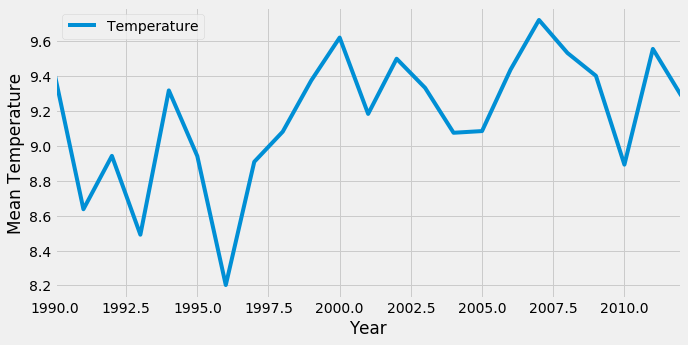

In [29]:
plt.figure()
plt.style.use('fivethirtyeight')

annual_mean_temperature.plot(figsize = (10,5), grid = True, legend = True)
plt.xlabel('Year')
plt.ylabel('Mean Temperature')

<h4> Let's explore greenhouse_df dataframe </h4>

In [30]:
greenhouse_df['Greenhouse Category'].unique()

array(['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent',
       'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent',
       'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent',
       'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent',
       'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'],
      dtype=obj

<h4> Renaming the emission categories to a shorter string </h4>

In [31]:
to_replace = greenhouse_df['Greenhouse Category'].unique()
replace_with = ['co2','ghgs1','ghgs2','hfcs','ch4','nf3','n2o','pfcs','sf6','hfcs+pfcs']
greenhouse_df.replace(to_replace, replace_with, inplace = True)

In [32]:
greenhouse_df['Greenhouse Category'].unique()

array(['co2', 'ghgs1', 'ghgs2', 'hfcs', 'ch4', 'nf3', 'n2o', 'pfcs',
       'sf6', 'hfcs+pfcs'], dtype=object)

<h4> Lets's get the mean emission per category per year </h4>

In [33]:
annual_mean_greenhouse = greenhouse_df.groupby(['Year','Greenhouse Category']).mean()

In [34]:
annual_mean_greenhouse.reset_index('Greenhouse Category',inplace = True)

In [35]:
annual_mean_greenhouse.reset_index('Year', inplace = True)

In [36]:
annual_mean_temperature.head()

,Temperature
Datetime,
1990,9.402640
1991,8.636589
1992,8.942246
1993,8.490705
1994,9.317268


<h4> Lets merge both dataframes together based on Year </h4>

In [37]:
for year in annual_mean_greenhouse['Year'].unique():
    for cat in annual_mean_greenhouse['Greenhouse Category'].unique():

        mask = (annual_mean_greenhouse['Year'] == year) & (annual_mean_greenhouse['Greenhouse Category'] == cat)
        annual_mean_temperature.loc[year, cat] = annual_mean_greenhouse[mask]['Value'].values[0]

In [53]:
annual_mean_temperature.head()

,Temperature,ch4,co2,ghgs1,ghgs2,hfcs,hfcs+pfcs,n2o,nf3,pfcs,sf6
Datetime,,,,,,,,,,,
1990,9.402640,87094.095299,455379.936166,633243.305620,587003.637294,6616.886179,3901.551150,36194.407289,18.383797,3838.874861,2074.533801
1991,8.636589,84511.860775,446193.986253,618145.225307,573555.753951,6159.500972,3680.115869,34748.195912,18.871227,3523.418645,2055.211806
1992,8.942246,81528.146297,431901.700232,597397.641955,554945.603744,5290.472902,3672.904628,33609.735740,19.408413,3198.749121,2059.102498
1993,8.490705,79167.104710,426304.676894,588482.640738,546260.074250,4992.882331,3672.738024,32976.558788,23.278081,3174.231901,2075.474610
1994,9.317268,77076.932886,421997.498173,580717.203385,539429.916433,5127.461987,3855.997597,32253.689517,25.988809,2977.335790,2029.666582


<h4> Let's see the relationship </h4>

Text(0, 0.5, 'Carbon dioxide (PPM)')

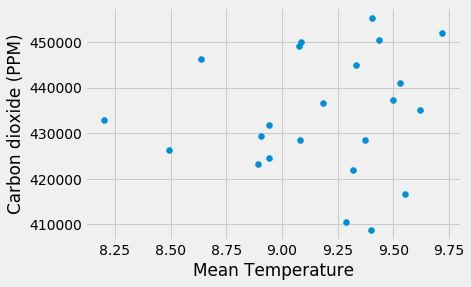

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(annual_mean_temperature['Temperature'],annual_mean_temperature['co2'])
plt.xlabel('Mean Temperature')
plt.ylabel('Carbon dioxide (PPM)')

In [39]:
annual_mean_temperature.corr()

,Temperature,ch4,co2,ghgs1,ghgs2,hfcs,hfcs+pfcs,n2o,nf3,pfcs,sf6
Temperature,1.000000,-0.421805,0.103099,-0.116934,-0.119192,0.446067,-0.463607,-0.528541,0.477042,-0.504202,-0.572090
ch4,-0.421805,1.000000,0.380805,0.700893,0.689663,-0.624211,0.560603,0.932743,-0.727128,0.900150,0.889358
co2,0.103099,0.380805,1.000000,0.920609,0.929735,-0.467428,-0.258875,0.373388,-0.028819,0.312048,0.227495
ghgs1,-0.116934,0.700893,0.920609,1.000000,0.997683,-0.572886,0.046412,0.670960,-0.315104,0.600796,0.527089
ghgs2,-0.119192,0.689663,0.929735,0.997683,1.000000,-0.612546,0.047228,0.673586,-0.321786,0.609919,0.537629
hfcs,0.446067,-0.624211,-0.467428,-0.572886,-0.612546,1.000000,-0.429178,-0.780703,0.706967,-0.828618,-0.819577
hfcs+pfcs,-0.463607,0.560603,-0.258875,0.046412,0.047228,-0.429178,1.000000,0.690188,-0.718358,0.719065,0.739614
n2o,-0.528541,0.932743,0.373388,0.670960,0.673586,-0.780703,0.690188,1.000000,-0.836666,0.980806,0.967379
nf3,0.477042,-0.727128,-0.028819,-0.315104,-0.321786,0.706967,-0.718358,-0.836666,1.000000,-0.877938,-0.867154
pfcs,-0.504202,0.900150,0.312048,0.600796,0.609919,-0.828618,0.719065,0.980806,-0.877938,1.000000,0.984444


In [40]:
#by_country.groupby(df['date'].dt.year)['a'].agg(['sum', 'mean', 'max'])